In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, RFE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
# load the preprocessed data
cleaned_data  = pd.read_csv("Cleaned_data_53v_Final.csv")

In [3]:
X = cleaned_data.drop(columns=['target'])
y = cleaned_data['target']

In [4]:
smote_enn = SMOTEENN(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.20, random_state=42)

## Stepwise - Selection

### recall - XGBoost

In [8]:
cv = StratifiedKFold(n_splits=5)

In [9]:
model = XGBClassifier(random_state=42)

In [11]:
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy', n_jobs=-1, verbose=3)
rfecv.fit(X_train, y_train)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 fe

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...),
      n_jobs=-1, scoring='accuracy', verbose=3)

In [14]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 46


In [15]:
selected_features = X_train.columns[rfecv.support_]
print('Selected features: {}'.format(selected_features))

Selected features: Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'open_acc', 'pub_rec', 'total_acc',
       'total_rev_hi_lim', 'avg_cur_bal', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tot_hi_cred_lim',
       'total_bc_limit', 'annual_inc_installment', 'annual_inc_dti',
       'loan_amnt_dti', 'home_ownership_MORTGAGE', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_small_business',
       'application_type_Joint App', 'region_SouthEast', 'region_West',
       'annual_inc_binned_Low', 'annual_inc_binned_Medium',
       'annual_inc_binned_Very Low

In [16]:
results = pd.DataFrame(rfecv.cv_results_)

In [17]:
results

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,0.812160,0.002072,0.809175,0.814188,0.811271,0.814808,0.811360
1,0.820081,0.001738,0.818320,0.821145,0.818502,0.822920,0.819517
2,0.828181,0.001694,0.827328,0.828923,0.826690,0.831169,0.826794
3,0.841463,0.009202,0.859654,0.836199,0.836093,0.839615,0.835756
4,0.846437,0.008356,0.862753,0.839192,0.843460,0.844613,0.842167
5,0.860276,0.009473,0.868084,0.868069,0.846802,0.850750,0.867672
6,0.868956,0.005922,0.871426,0.872535,0.872247,0.857145,0.871424
7,0.872905,0.006328,0.874723,0.876409,0.875300,0.860411,0.877683
8,0.880422,0.000778,0.879067,0.880921,0.881027,0.881071,0.880022
9,0.887722,0.000596,0.886845,0.887164,0.888227,0.888256,0.888119


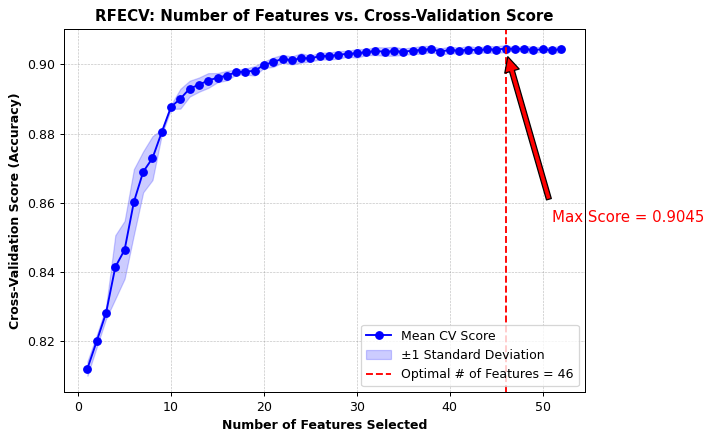

In [175]:
mean_test_score = rfecv.cv_results_['mean_test_score']
std_test_score = rfecv.cv_results_['std_test_score']
features = range(1, len(mean_scores) + 1)

plt.figure(dpi=90, figsize=(8, 5))
plt.xlabel("Number of Features Selected", fontweight='bold')
plt.ylabel("Cross-Validation Score (Accuracy)",fontweight='bold')
plt.title("RFECV: Number of Features vs. Cross-Validation Score",fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.plot(features, mean_test_score, marker='o', color='b', label='Mean CV Score')
plt.fill_between(features, mean_test_score - std_test_score, mean_test_score + std_test_score, 
                 color='blue', alpha=0.2, label='±1 Standard Deviation')

# optimal number of features
optimal_feat = rfecv.n_features_
plt.axvline(x=optimal_feat, color='r', linestyle='--', label=f'Optimal # of Features = {optimal_feat}')

# try to show the maximum score
max_score = max(mean_test_score)
plt.annotate(f'Max Score = {max_score:.4f}', xy=(optimal_feat, max_score), xytext=(optimal_feat + 5, max_score - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='r')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [197]:
model_imp = RandomForestClassifier(n_estimators=100, random_state=42)

In [199]:
model_imp.fit(X_train[selected_features], y_train)
y_pred = model_imp.predict(X_test[selected_features])

In [200]:
feature_importances = model_imp.feature_importances_
feature_names = X_train[selected_features].columns

importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

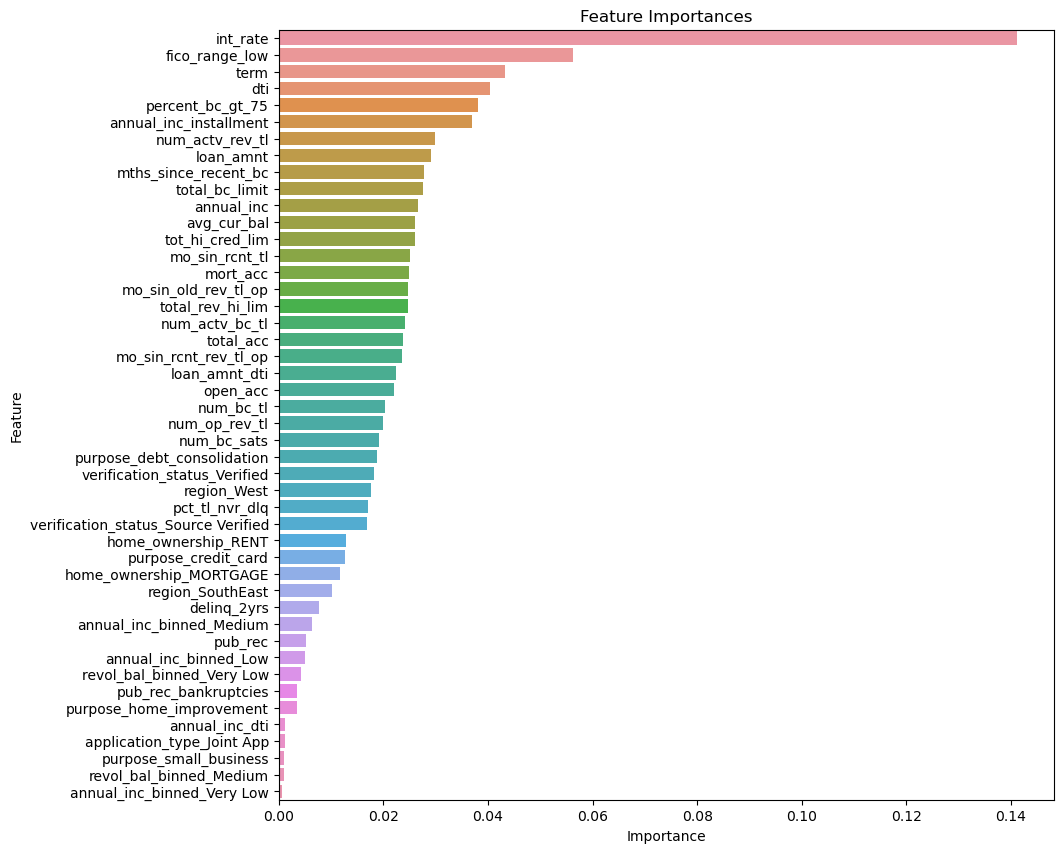

In [201]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.show()

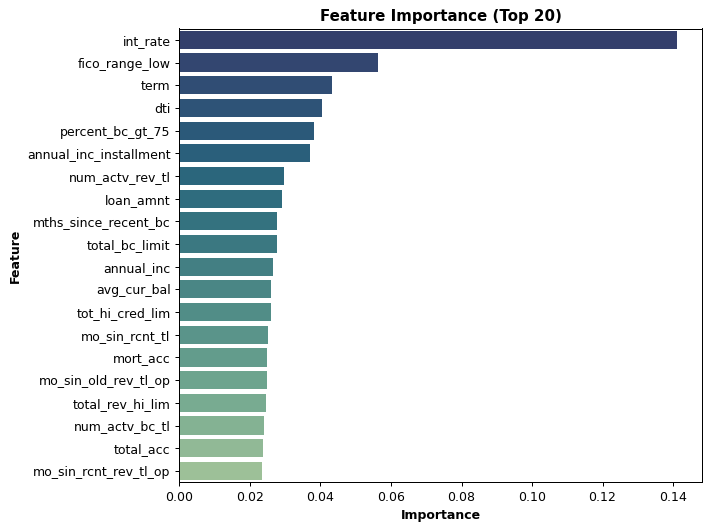

In [265]:
top_20_feat = importances.head(20)

plt.figure(figsize=(8, 6), dpi=90)
sns.barplot(x='Importance', y='Feature', data=top_20_feat, palette='crest_r')
plt.title('Feature Importance (Top 20)', fontweight='bold')
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.tight_layout()

plt.show()

In [89]:
col = corr.abs().sort_values(ascending=False).index.tolist()

In [90]:
final = cleaned_data[col]

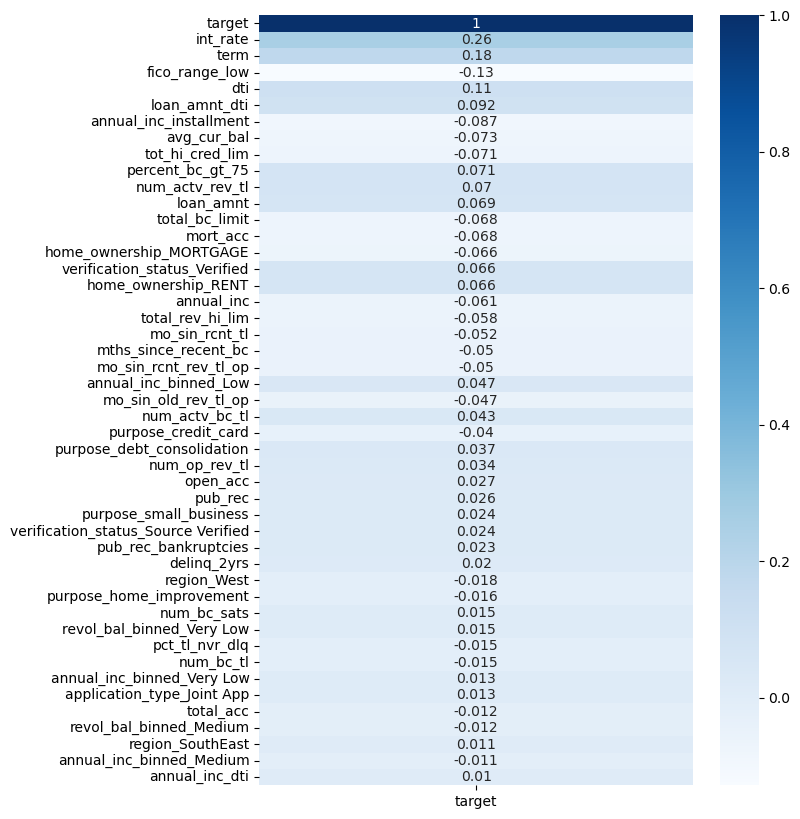

In [92]:
corr = final.corr()[['target']]

plt.figure(figsize=(7,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Blues)
plt.show()

In [53]:
final.to_csv('final_data_V2.csv', index = False)